<a href="https://colab.research.google.com/github/amishapai/Python-Projects/blob/main/Covid-DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries needed
!pip install mplcursors
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io
import mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21069 sha256=cd50cb3cc98e1db9898d029ba2f0bb6967a7fc043eb4e9ea0c8de3f448aa8073
  Stored in directory: /root/.cache/pip/wheels/6d/02/b1/7d5c397daf88f75d3432168edddd8b02d3ae2c050ffa7ca26f
Successfully built mplcursors


In [ ]:
#using google.colab for uploading the respective csv
#uploading dataset CSV with age, commorbidity and outcome of patient
uploaded = files.upload()
# uploading population csv with x,y co-ordinate of infected regiona and the population of each region
uploaded = files.upload()
# uploading csv with only x y coordinates which are sorted
uploaded = files.upload()

Saving COVID_Dataset.csv to COVID_Dataset.csv


Saving Population.csv to Population.csv


Saving xy_data.csv to xy_data.csv


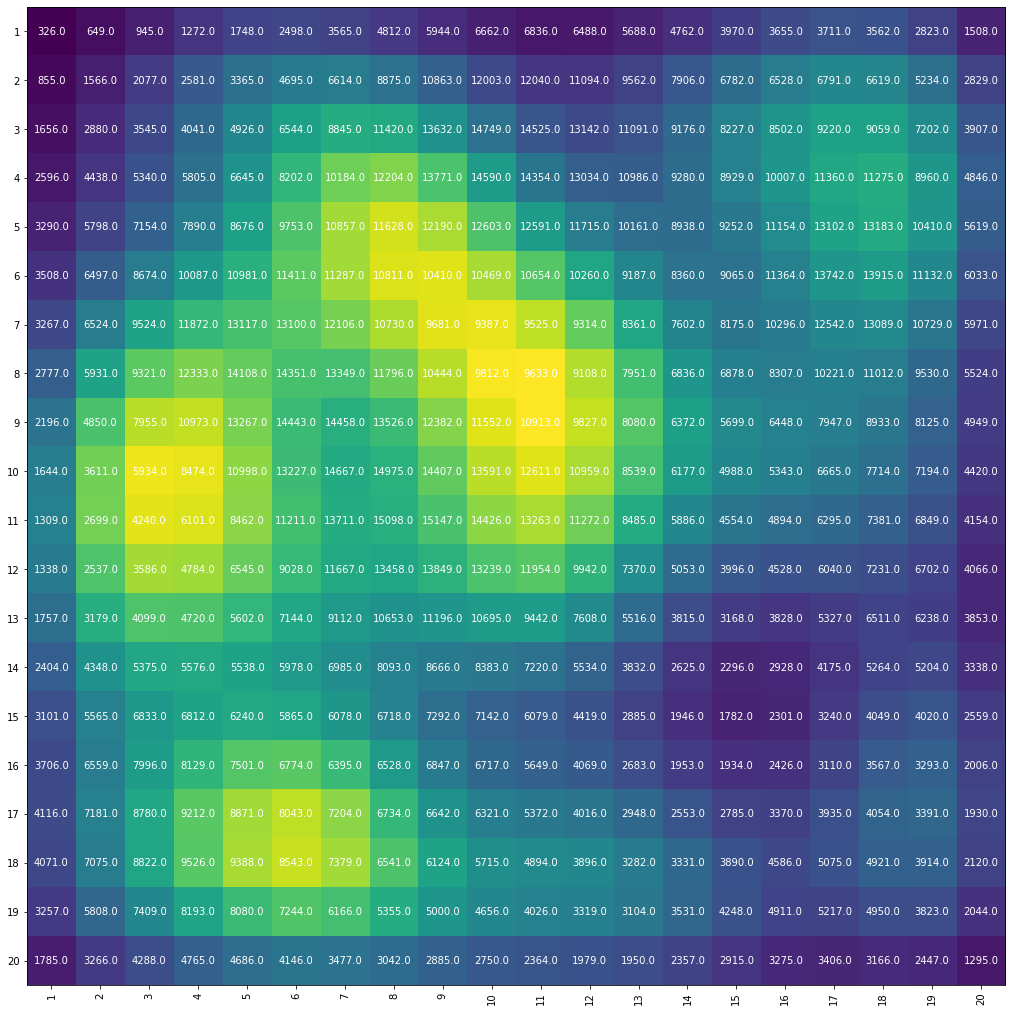

In [ ]:
#1
#To create a heat map of the number of population region-wise
df = pd.read_csv('Population.csv')
x = np.arange(0, 20)
y = np.arange(0, 20)
heatmap = np.array(df['Population']).reshape(20, 20)

fig = plt.figure(figsize=(18,18))
ax = plt.subplot()
ax.imshow(heatmap)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels([str(i+1) for i in x], rotation=90)
ax.set_yticklabels([str(i+1) for i in y])

for a in range(len(np.arange(1, 21))):
    for b in range(len(np.arange(1, 21))):
        text = ax.text(a, b, heatmap[a, b], ha='center', va='center', color='w')
plt.show()

(1.0, 20.0)

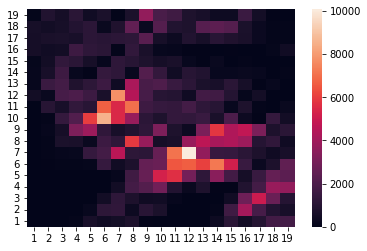

In [ ]:
#2
#create heat map of the regions infected and sort them based on co-ordinates
df_1 = pd.read_csv('xy_data.csv')
data_1 = np.transpose(pd.DataFrame.to_numpy(df_1))

x = data_1[0]
y = data_1[1]
count = np.zeros(shape = (21,21))
# counting cases from in each region
for i in range(len(x)):
  count[x[i], y[i]] = count[x[i], y[i]] + 1

#adjusting axis and count
count = count[1:21, 1:21]
sns.heatmap(count)
ax=plt.gca()
ax.set_xlim(1, 20)
ax.set_ylim(1, 20)

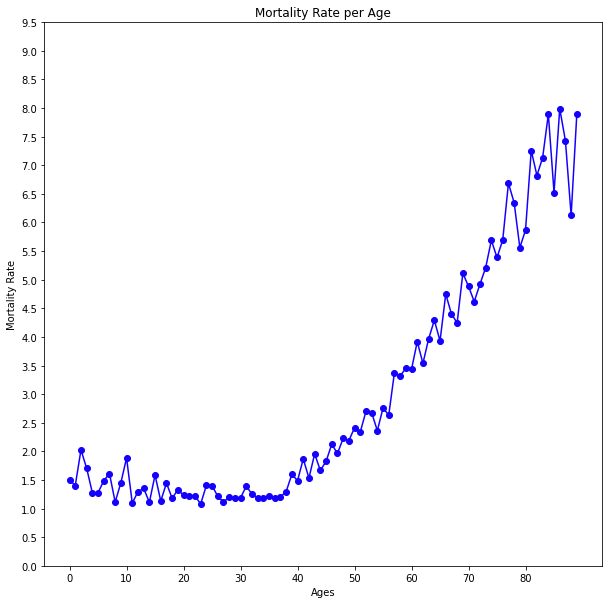

Age group with highest mortality rate: 86


In [ ]:
#3
#to create a graph to show mortality per age group
virus = pd.read_csv('COVID_Dataset.csv')
ppl = pd.read_csv('Population.csv')
dead_per_age = virus[virus['Outcome'] == 'Dead'].groupby('Age')['Outcome'].count()
ppl_per_age = virus.groupby('Age')['Outcome'].count()
mortality = (dead_per_age / ppl_per_age) * 100
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
plt.plot(range(0, 90), mortality, color='#1300FF', marker='o')
ax.set_xticks(range(0, 90, 10))
ax.set_yticks(np.arange(0, 10, 0.5))
plt.xlabel('Ages')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate per Age')
plt.show()

print('Age group with highest mortality rate: {}'.format(list(mortality).index(mortality.max())))

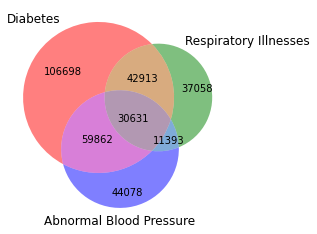

In [ ]:
#4
# to create a venn diagram to show relations between the three commorbodities
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline
df =pd.read_csv('COVID_Dataset.csv')
first = len(df[(df['Diabetes']=='Y')&(df['Respiratory Illnesses']=='Y')&(df['Abnormal Blood Pressure']=='N')])
sec = len(df[(df['Diabetes']=='Y')&(df['Respiratory Illnesses']=='N')&(df['Abnormal Blood Pressure']=='N')])
third = len(df[(df['Diabetes']=='Y')&(df['Abnormal Blood Pressure']=='Y')&(df['Respiratory Illnesses']=='N')])
fourth = len(df[(df['Respiratory Illnesses']=='Y')&(df['Abnormal Blood Pressure']=='Y')&(df['Diabetes']=='N')])
fifth = len(df[(df['Respiratory Illnesses']=='Y')&(df['Abnormal Blood Pressure']=='N')&(df['Diabetes']=='N')])
sixth = len(df[(df['Abnormal Blood Pressure']=='Y')&(df['Respiratory Illnesses']=='N')&(df['Diabetes']=='N')])
seventh = len(df[(df['Diabetes']=='Y')&(df['Respiratory Illnesses']=='Y')&(df['Abnormal Blood Pressure']=='Y')])
venn3(subsets = (sec,fifth,first,sixth,third,fourth,seventh),
      set_labels = ('Diabetes', 'Respiratory Illnesses', 'Abnormal Blood Pressure'), alpha = 0.5)

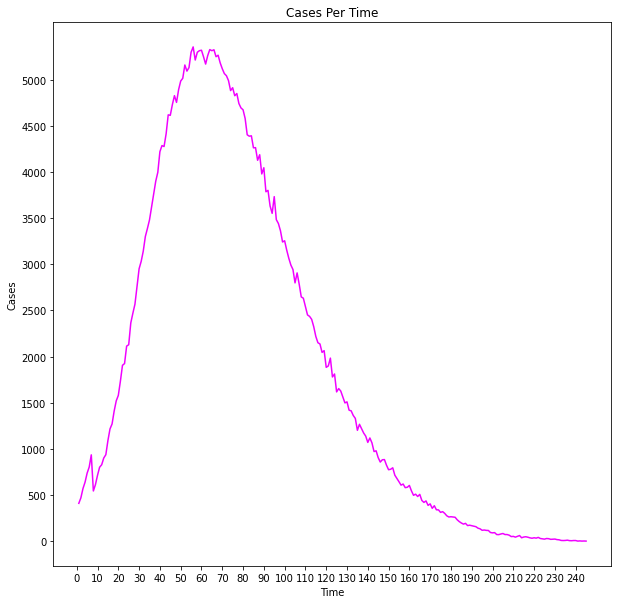

Time when cases were maximum: 55
Time when cases were minimum: 240


In [ ]:
#5
# to create a graph to show relation between number of cases over time
virus = pd.read_csv('COVID_Dataset.csv')
time = virus.groupby('Time of reporting')['x location'].count()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
plt.plot(range(1, 246), time, color='#F001FF')
plt.title('Cases Per Time')
plt.xlabel('Time')
plt.ylabel('Cases')
ax.set_yticks(range(0, time.max(), 500))
ax.set_xticks(range(0, 246, 10))
plt.show()

print('Time when cases were maximum: {}'.format(list(time).index(time.max())))
print('Time when cases were minimum: {}'.format(list(time).index(time.min())))

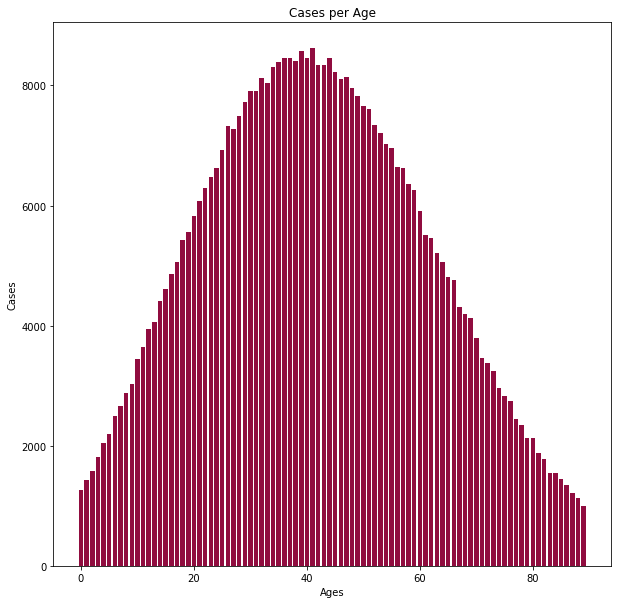

In [ ]:
#6
# graph to show the number of patients per age
df = pd.read_csv('COVID_Dataset.csv')
age = df[(df['Outcome'] == "Alive") |
         (df['Outcome'] == 'Dead')].groupby('Age')['Time of reporting'].count()
fig = plt.figure(figsize=(10, 10))
plt.bar(range(0, 90), age, color='#900C3F')
plt.title('Cases per Age')
plt.xlabel('Ages')
plt.ylabel('Cases')

plt.show()

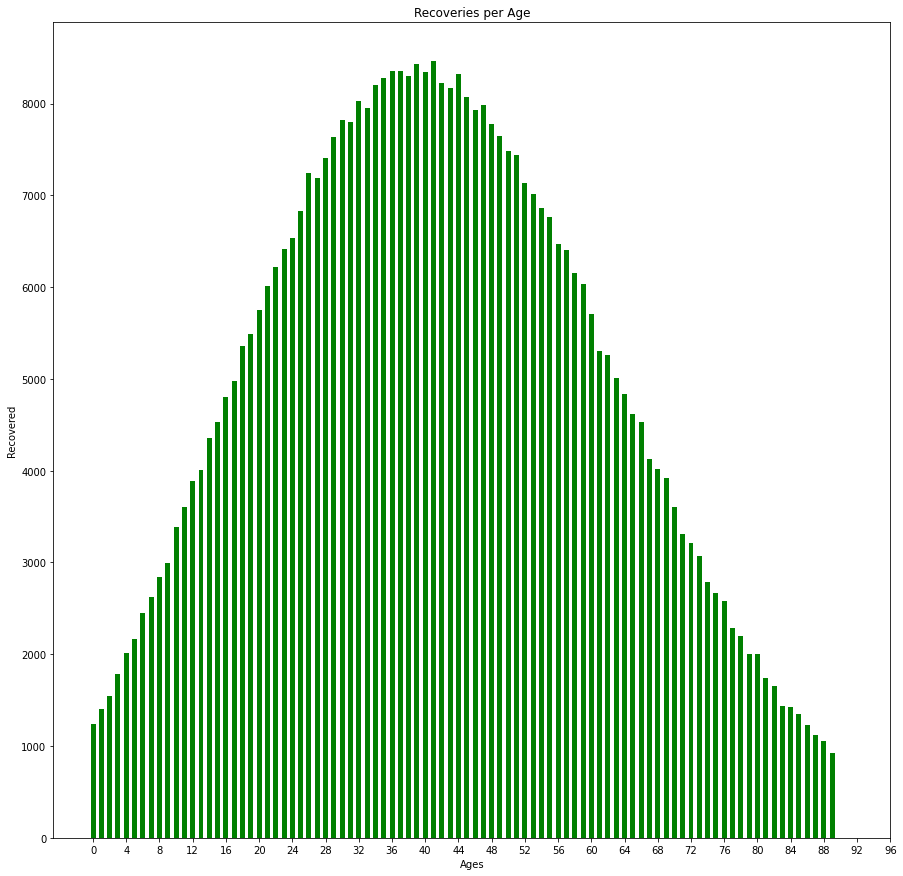

In [ ]:
#7
# graph to show number of recoveries per age
df = pd.read_csv('COVID_Dataset.csv')
deaths = df[df['Outcome'] == "Alive"].groupby('Age')['Time of reporting'].count()
fig = plt.figure(figsize=(15, 15))
plt.bar(range(0, 90), deaths, color='green', width=0.6)
plt.title('Recoveries per Age')
plt.xlabel('Ages')
plt.ylabel('Recovered')
plt.xticks((np.arange(0, 100, step=4)))
plt.show()

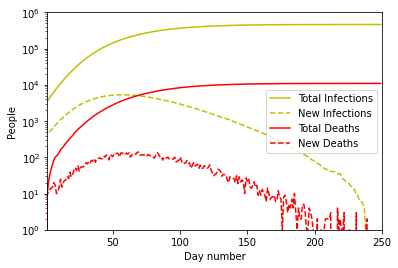

In [ ]:
#8
# graph to give summarised information on the infections - old and new and number of deaths
df = pd.read_csv("COVID_Dataset.csv")
pop = pd.read_csv("Population.csv")

new_inf = [0]*250
new_mort = [0]*250

sz = len(df['Age'])
for i in range(sz):
    new_inf[df['Time of Infection'][i]] += 1
    if df['Outcome'][i] == 'Dead':
        new_mort[df['Time of reporting'][i]] += 1

tot_inf = new_inf[0:250]
tot_mort = new_mort[0:250]

for i in range(len(new_inf)-1):
    tot_inf[i+1] = tot_inf[i] + new_inf[i+1]
    tot_mort[i+1] = tot_mort[i] + new_mort[i+1]
plt.plot(range(250), tot_inf, 'y-', label = "Total Infections")
plt.plot(range(250), new_inf, 'y--', label = "New Infections")
plt.plot(range(250), tot_mort, 'r-', label = "Total Deaths")
plt.plot(range(250), new_mort, 'r--', label = "New Deaths")
plt.legend()
plt.yscale('log')
plt.axis([1,250,1,1000000])
plt.ylabel('People')
plt.xlabel('Day number')
plt.show()